## Diagnóstico de câncer

O objetivo é verificar qual diagnóstico de câncer pode ter sido classificado de forma errônea. Onde o câncer é malígno e foi classificado como benigno ou quando realmente é benigno e é classificado como malígno.

Os 8 variáveis independentes, dentre elas está o tamanho e forma da uniformidade e quantidade de mitoses.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('breast-cancer-wisconsin.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


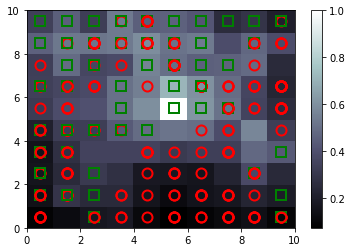

In [5]:
# Self Organizing Map

y = np.where(y==2, 0, y) # benign
y = np.where(y==4, 1, y) # malignant

column = pd.to_numeric(X[:, 6], errors = 'coerce', downcast='integer')

mask = np.isnan(column)
masked_arr = np.ma.masked_array(column, mask)
means = np.mean(masked_arr, axis=0)
X[:, 6] = masked_arr.filled(int(means))

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 10, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
#pcolor(som.distance_map())
pcolor(som.distance_map().T)
colorbar()
markers = ['s', 'o']
colors = ['g', 'r']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the possible errors
mappings = som.win_map(X)

# errors = np.concatenate((mappings[(5,3)], mappings[(4,3)]), axis = 0)
# errors = sc.inverse_transform(errors)

### Resultados

As regiões mais claras representam regiões de transição onde é aceitável diferentes classificações. Nas regiões mais escuras classificações diferentes podem representar erros. Ou seja, pode ter sido diagnosticado câncer maligno onde na verdade é do tipo benigno, o inverso também se faz verdade. 